In [65]:
#Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
#read in the data
data = pd.read_csv('hospital_data.csv')
data.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID
0,11/4/2019 0:00,"$1,183.22",$10.00,$20.17,ANCHOR,HMO,OUTPATIENT,8:35:45,9:17:54,9:29:46,DR05350C4,C10001
1,11/6/2019 0:00,$738.48,$-,$15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,DR09451Z4,C10002
2,11/2/2019 0:00,$660.00,$-,$21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,DR17400I4,C10003
3,11/6/2019 0:00,$600.00,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,9:38:34,10:55:50,10:58:02,DR09451Z4,C10004
4,11/1/2019 0:00,$591.60,$-,$12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,DR15154H4,C10005


In [44]:
data.dtypes

Date                      datetime64[ns]
Medication Revenue               float64
Lab Cost                         float64
Consultation Revenue             float64
Doctor Type                       object
Financial Class                   object
Patient Type                      object
Entry Time                datetime64[ns]
Post-Consultation Time    datetime64[ns]
Completion Time           datetime64[ns]
Doctor                            object
Patient ID                        object
dtype: object

In [ ]:
#removing whitespace from column names
data.columns = data.columns.str.strip()

data.columns

In [22]:
#changing date data to datetime
data['Date'] = pd.to_datetime(data['Date'])
data['Post-Consultation Time'] = pd.to_datetime(data['Post-Consultation Time'])
data['Entry Time'] = pd.to_datetime(data['Entry Time'])
data['Completion Time'] = pd.to_datetime(data['Completion Time'])

data.dtypes

Date                      datetime64[ns]
Medication Revenue                object
Lab Cost                          object
Consultation Revenue              object
Doctor Type                       object
Financial Class                   object
Patient Type                      object
Entry Time                datetime64[ns]
Post-Consultation Time    datetime64[ns]
Completion Time           datetime64[ns]
Doctor                            object
Patient ID                        object
dtype: object

In [ ]:
#function to clean number strings
def clean(x):
    x = x.replace('$','')
    x = x.replace(',','')
    x = x.replace('-','')
    x = x.replace(' ','')
    x = pd.to_numeric(x)
    return x
data['Medication Revenue'] = data['Medication Revenue'].apply(clean)

In [ ]:
data['Consultation Revenue'] = data['Consultation Revenue'].apply(clean)

In [ ]:
data['Lab Cost'] = data['Lab Cost'].apply(clean)

In [40]:
#All Numerical values are now floats
data.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,2021-06-22 08:35:45,2021-06-22 09:17:54,2021-06-22 09:29:46,DR05350C4,C10001
1,2019-11-06,738.48,NaN,15.00,ANCHOR,INSURANCE,OUTPATIENT,2021-06-22 19:19:16,2021-06-22 21:02:36,2021-06-22 21:24:07,DR09451Z4,C10002
2,2019-11-02,660.00,NaN,21.17,ANCHOR,HMO,OUTPATIENT,2021-06-22 10:46:52,2021-06-22 11:56:25,2021-06-22 12:06:28,DR17400I4,C10003
3,2019-11-06,600.00,NaN,NaN,ANCHOR,MEDICARE,OUTPATIENT,2021-06-22 09:38:34,2021-06-22 10:55:50,2021-06-22 10:58:02,DR09451Z4,C10004
4,2019-11-01,591.60,NaN,12.00,ANCHOR,INSURANCE,OUTPATIENT,2021-06-22 11:16:21,2021-06-22 12:06:49,2021-06-22 12:06:54,DR15154H4,C10005


In [23]:
data.columns

Index(['Date', 'Medication Revenue', 'Lab Cost', 'Consultation Revenue',
       'Doctor Type', 'Financial Class', 'Patient Type', 'Entry Time',
       'Post-Consultation Time', 'Completion Time', 'Doctor', 'Patient ID'],
      dtype='object')

In [46]:
#Total revenue column
data['Total Revenue'] = data['Medication Revenue'] + data['Consultation Revenue'] + data['Lab Cost']
data.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Total Revenue
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,2021-06-22 08:35:45,2021-06-22 09:17:54,2021-06-22 09:29:46,DR05350C4,C10001,1213.39
1,2019-11-06,738.48,NaN,15.00,ANCHOR,INSURANCE,OUTPATIENT,2021-06-22 19:19:16,2021-06-22 21:02:36,2021-06-22 21:24:07,DR09451Z4,C10002,NaN
2,2019-11-02,660.00,NaN,21.17,ANCHOR,HMO,OUTPATIENT,2021-06-22 10:46:52,2021-06-22 11:56:25,2021-06-22 12:06:28,DR17400I4,C10003,NaN
3,2019-11-06,600.00,NaN,NaN,ANCHOR,MEDICARE,OUTPATIENT,2021-06-22 09:38:34,2021-06-22 10:55:50,2021-06-22 10:58:02,DR09451Z4,C10004,NaN
4,2019-11-01,591.60,NaN,12.00,ANCHOR,INSURANCE,OUTPATIENT,2021-06-22 11:16:21,2021-06-22 12:06:49,2021-06-22 12:06:54,DR15154H4,C10005,NaN


In [50]:
#Changing NAN values to 0$
data = data.fillna(0)

# What time has the most visitors?

In [53]:
data['Entry Hour'] = data['Entry Time'].dt.hour

data.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Total Revenue,Entry Hour
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,2021-06-22 08:35:45,2021-06-22 09:17:54,2021-06-22 09:29:46,DR05350C4,C10001,1213.39,8
1,2019-11-06,738.48,0.0,15.00,ANCHOR,INSURANCE,OUTPATIENT,2021-06-22 19:19:16,2021-06-22 21:02:36,2021-06-22 21:24:07,DR09451Z4,C10002,0.00,19
2,2019-11-02,660.00,0.0,21.17,ANCHOR,HMO,OUTPATIENT,2021-06-22 10:46:52,2021-06-22 11:56:25,2021-06-22 12:06:28,DR17400I4,C10003,0.00,10
3,2019-11-06,600.00,0.0,0.00,ANCHOR,MEDICARE,OUTPATIENT,2021-06-22 09:38:34,2021-06-22 10:55:50,2021-06-22 10:58:02,DR09451Z4,C10004,0.00,9
4,2019-11-01,591.60,0.0,12.00,ANCHOR,INSURANCE,OUTPATIENT,2021-06-22 11:16:21,2021-06-22 12:06:49,2021-06-22 12:06:54,DR15154H4,C10005,0.00,11


In [60]:
# How many people during what entry hour (Groupby Hour)
pivot = data.groupby(['Entry Hour'])['Patient ID'].count()
pivot

Entry Hour
7       12
8     3489
9     4297
10    3680
11    3306
12    1446
13     426
14    3030
15    1847
16    1249
17     219
18    2600
19    2269
20    1358
21     500
22     238
23      33
Name: Patient ID, dtype: int64

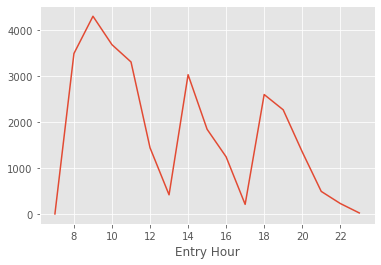

In [66]:
plt.style.use('ggplot')
pivot = data.groupby(['Entry Hour'])['Patient ID'].count().plot()

<AxesSubplot:xlabel='Entry Hour', ylabel='count'>

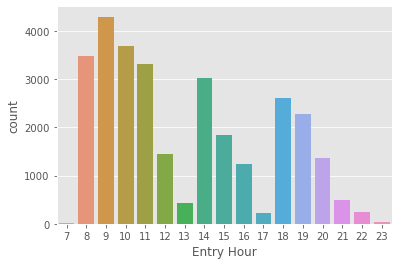

In [74]:
sns.countplot('Entry Hour', data= data)

# Does the Total Revenue correlate with the Total Visitors

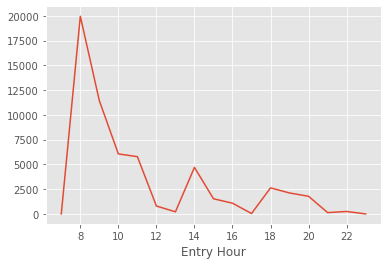

In [76]:
pivot2 = data.groupby(['Entry Hour'])['Total Revenue'].sum().plot()

In [82]:
pivot3 = data.groupby(['Entry Hour']).sum()
pivot4 = data.groupby(['Entry Hour']).count()
merge = pivot3.merge(pivot4, on='Entry Hour')
merge.head()

,Medication Revenue_x,Lab Cost_x,Consultation Revenue_x,Total Revenue_x,Date,Medication Revenue_y,Lab Cost_y,Consultation Revenue_y,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Total Revenue_y
Entry Hour,,,,,,,,,,,,,,,,,
7,350.66,520.00,198.63,0.00,12,12,12,12,12,12,12,12,12,12,12,12,12
8,83404.62,22475.27,51180.15,19959.28,3489,3489,3489,3489,3489,3489,3489,3489,3489,3489,3489,3489,3489
9,96195.61,14879.28,60216.56,11429.42,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297
10,75239.66,6688.98,52072.67,6060.60,3680,3680,3680,3680,3680,3680,3680,3680,3680,3680,3680,3680,3680
11,72675.83,6860.23,48192.03,5780.90,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306


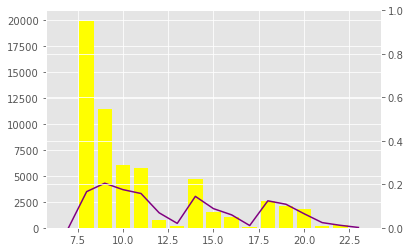

In [91]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(merge.index, merge['Total Revenue_x'],color = 'yellow')
ax1.plot(merge.index, merge['Patient ID'], color= 'purple')

#  What % of revenue comes from different insurance types

In [107]:
pivot5 = data.groupby('Financial Class').sum()
pivot5.head()

,Medication Revenue,Lab Cost,Consultation Revenue,Total Revenue,Entry Hour
Financial Class,,,,,
CORPORATE,160923.52,21020.31,73716.25,13095.86,86092
HMO,130586.81,12281.99,73056.27,20348.92,47761
INSURANCE,307160.57,9509.46,144869.66,21459.02,130986
MEDICARE,20389.14,1813.54,2336.60,3592.48,3521
PRIVATE,0.00,22244.93,164037.95,0.00,121763


([<matplotlib.patches.Wedge at 0x169281b71c0>,
 [Text(0.8389660033222808, 0.7114323898090662, 'CORPORATE'),
  Text(-0.8809318390398697, 0.6587557172168095, 'HMO'),
  Text(0.03568524056055654, -1.0994210129000335, 'INSURANCE'),
  Text(1.0795897830727403, -0.21091680891990058, 'MEDICARE'),
  Text(1.0999999999999892, -1.544841498309619e-07, 'PRIVATE')],
 [Text(0.4576178199939712, 0.38805403080494516, '22.4%'),
  Text(-0.4805082758399289, 0.35932130030007786, '34.8%'),
  Text(0.019464676669394474, -0.5996841888545636, '36.7%'),
  Text(0.5888671544033128, -0.11504553213812757, '6.1%'),
  Text(0.5999999999999941, -8.426408172597922e-08, '0.0%')])

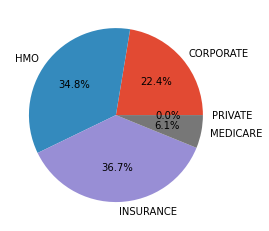

In [117]:
plt.pie(pivot5['Total Revenue'],labels=pivot5.index,autopct='%1.1f%%')